In [10]:
import math 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
import pandas as pd
from matplotlib import animation, rc
plt.rcParams.update({'pdf.fonttype': 'truetype'})
import math
# %matplotlib inline
# from qbstyles import mpl_style
# mpl_style(dark=False)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
## Environment simulator
def plus(x):
    return 0 if x < 0 else x
def minus(x):
    return 0 if x > 0 else -x
def shock(x): #웹페이지에서 봤던 충격함수.(충격함수는 가격 변화에 따른 수요영향력)
    return np.sqrt(x) 
# Demand at time step t for current price p_t and previous price p_t_1
def q_t(p_t, p_t_1, q_0, k, a, b):
    demand_change_percent.append(plus(q_0 - k*p_t - a*shock(plus(p_t - p_t_1)) + b*shock(minus(p_t - p_t_1))) )
    return plus(q_0 - k*p_t - a*shock(plus(p_t - p_t_1)) + b*shock(minus(p_t - p_t_1))) #웹페이지에서 봤던 수요함수임(d(t,j))
# Profit at time step t
def profit_t(p_t, p_t_1, q_0, k, a, b, unit_cost):
    return q_t(p_t, p_t_1, q_0, k, a, b)*(p_t - unit_cost) #q_t(,,,) 이거는 demand임. #(p_t - unit_cost)는 순이익임(가격-유닛당 비용) 즉, 리턴값(profit) = 수요 * 순이익
# Total profit for price vector p over len(p) time steps
def profit_total(p, unit_cost, q_0, k, a, b):
    return profit_t(p[0], p[0], q_0, k, 0, 0, unit_cost) + sum(map(lambda t: profit_t(p[t], p[t-1], q_0, k, a, b, unit_cost), range(len(p))))

## fuction order ##############################
# 1. profit_t_response(p_t, p_t_1)
# 2. profit_t(p_t, p_t_1, q_0, k, a_q, b_q, unit_cost)
# 3. q_t()



## Custom Part 최승원 ###########################
# 1. demand의 변화량을 비율로 환산
# 2. 예측값 (q_list) 에 위에서 구한 변화량의 대입 
q_list = [60, 40, 50, 20, 20, 70, 60]
demand_change_percent = [] # dimension: price_grid[i] * price_change_grid[j]

## Custom Part 최승원 ###########################


## Environment parameters
T = 7
price_max = 4500
price_step = 200
q_0 = 4000 
k = 0.8
unit_cost = 100
a_q = 1
b_q = 10

## Partial bindings for readability
def profit_t_response(p_t, p_t_1):
    return profit_t(p_t, p_t_1, q_0, k, a_q, b_q, unit_cost) #택배 도메인에 맞춰서 들어가야 하는 상수.

def profit_response(p):
    return profit_total(p, unit_cost, q_0, k, a_q, b_q)

## Visualize price-demand functions
price_grid = np.arange(2000, price_max, price_step) ## price_step: 최소가격, 뒤 price_step: 가격 간격
price_change_grid = np.arange(0.5, 2.0, 0.1) ## [0.5, 0.6, 0.7 ,,, 1.9]
profit_map = np.zeros( (len(price_grid), len(price_change_grid)) ) #행 : price_gird 개수, 열 : price_change_grid 개수

for i in range(len(price_grid)):
    for j in range(len(price_change_grid)):
        profit_map[i,j] = profit_t_response(price_grid[i], price_grid[i]*price_change_grid[j]) #(t시간에 가격, 가격변화량)
## 즉, 위의 반복문으로 profti_map 매트릭스에는 행에 가격, 열에 변화량을 축으로 밸류값으로는 수요 * 순이익이 들어감


In [13]:

price_change_grid
# np.array(demand_change_percent).reshape(-1, 19)
np.array(demand_change_percent).max()
grid = []

for i in range(len(price_grid)):
    row = []
    for j in range(len(price_change_grid)):
        row.append([price_grid[i], int(price_grid[i]*price_change_grid[j])])
    grid.append(row)

demand_change_percent[:3]

for i in grid:
    print(i)

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9])

2824.2640687119283

[2368.3772233983163, 2371.715728752538, 2375.505102572168]

[[2000, 1000], [2000, 1200], [2000, 1400], [2000, 1599], [2000, 1799], [2000, 1999], [2000, 2199], [2000, 2399], [2000, 2599], [2000, 2800], [2000, 2999], [2000, 3199], [2000, 3399], [2000, 3599], [2000, 3799]]
[[2200, 1100], [2200, 1320], [2200, 1540], [2200, 1759], [2200, 1979], [2200, 2199], [2200, 2419], [2200, 2639], [2200, 2859], [2200, 3080], [2200, 3299], [2200, 3519], [2200, 3739], [2200, 3959], [2200, 4179]]
[[2400, 1200], [2400, 1440], [2400, 1680], [2400, 1919], [2400, 2160], [2400, 2399], [2400, 2639], [2400, 2879], [2400, 3119], [2400, 3360], [2400, 3599], [2400, 3839], [2400, 4079], [2400, 4320], [2400, 4559]]
[[2600, 1300], [2600, 1560], [2600, 1819], [2600, 2080], [2600, 2339], [2600, 2599], [2600, 2859], [2600, 3119], [2600, 3379], [2600, 3639], [2600, 3899], [2600, 4159], [2600, 4419], [2600, 4679], [2600, 4939]]
[[2800, 1400], [2800, 1680], [2800, 1959], [2800, 2240], [2800, 2519], [2800, 2799], [2800, 3079], [2800, 3359], [2800, 3639], [2800, 3919], [2800, 4199], [

<Figure size 1152x360 with 0 Axes>

Text(0.5, 0, 'fee of one box')

Text(0, 0.5, 'Profit')

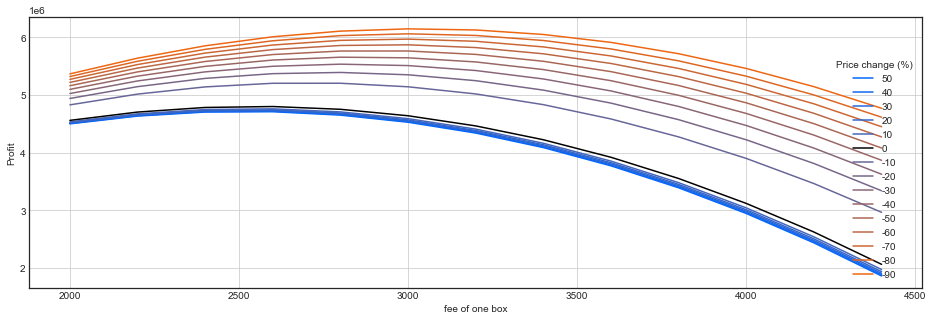

In [14]:

plt.figure(figsize=(16, 5))
for i in range(len(price_change_grid)):
    if math.isclose(price_change_grid[i], 1.0):
        color = 'black'
    else:
        p_norm = (price_change_grid[i]-0.5)/1.5
        color = (p_norm, 0.4, 1 - p_norm)
    plt.plot(price_grid, profit_map[:, i], c=color)
    
plt.xlabel("fee of one box")
plt.ylabel("Profit")
plt.legend(np.int_(np.round((1-price_change_grid)*100)), loc='lower right', title="Price change (%)", fancybox=False, framealpha=0.6) # 1-price_change_grid)*100) 여기서 price change gird가 1.9이면 -90이 되는 것.
plt.grid(True)

In [15]:
# Find optimal constant price

profits = np.array([ profit_response(np.repeat(p, T)) for p in price_grid ])
p_idx = np.argmax(profits)
price_opt_const = price_grid[p_idx]

print(f'Optimal price is {price_opt_const}, achieved profit is {profits[p_idx]}')

Optimal price is 2600, achieved profit is 38400000.0


In [11]:
for p in price_grid:
    profit_response(np.repeat(p, T)) 

36480000.0

37632000.0

38272000.0

38400000.0

38016000.0

37120000.0

35712000.0

33792000.0

31360000.0

28416000.0

24960000.0

20992000.0

16512000.0

In [12]:
price_grid

array([2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000,
       4200, 4400])

In [11]:
## Environment simulator
def plus(x):
    return 0 if x < 0 else x
def minus(x):
    return 0 if x > 0 else -x
def shock(x): #웹페이지에서 봤던 충격함수.(충격함수는 가격 변화에 따른 수요영향력)
    y= math.sqrt(-0.07334551044115296*x+4.336372642966939)
    y_2 = y / 120
    return y_2 
# Demand at time step t for current price p_t and previous price p_t_1
def q_t(p_t, p_t_1, q_0, k, a, b, q_setting):
    return plus(q_0[q_setting] - k*p_t - a*shock(plus(p_t - p_t_1)) + b*shock(minus(p_t - p_t_1))) #웹페이지에서 봤던 수요함수임(d(t,j))
# Profit at time step t
def profit_t(p_t, p_t_1, q_0, k, a, b, unit_cost, q_setting):
    return q_t(p_t, p_t_1, q_0, k, a, b, q_setting)*(p_t - unit_cost) #q_t(,,,) 이거는 demand임. #(p_t - unit_cost)는 순이익임(가격-유닛당 비용) 즉, 리턴값(profit) = 수요 * 순이익
# Total profit for price vector p over len(p) time steps
def profit_total(p, unit_cost, q_0, k, a, b):
    # 여기 0넣으면 안될듯 아마
    return profit_t(p[0], p[0], q_0, k, 0, 0, unit_cost, 0) + sum(map(lambda t: profit_t(p[t], p[t-1], q_0, k, a, b, unit_cost, t), range(len(p))))
## Environment parameters
T = 7
price_max = 4000
price_step = 200
q_0 = [ 8536, 11912, 13756, 10330, 12929, 5512, 6538 ] 
k = 0.4
unit_cost = 100
a_q = 1
b_q = 30
## Partial bindings for readability
def profit_t_response(p_t, p_t_1):
    return profit_t(p_t, p_t_1, q_0, k, a_q, b_q, unit_cost, 0) #택배 도메인에 맞춰서 들어가야 하는 상수.

def profit_response(p):
    return profit_total(p, unit_cost, q_0, k, a_q, b_q)

## Visualize price-demand functions
price_grid = np.arange(price_step, price_max, price_step) ## price_step: 최소가격, 뒤 price_step: 가격 간격
price_change_grid = np.arange(0.5, 2.0, 0.1) ## [0.5, 0.6, 0.7 ,,, 1.9]
profit_map = np.zeros( (len(price_grid), len(price_change_grid)) ) #행 : price_gird 개수, 열 : price_change_grid 개수

for i in range(len(price_grid)):
    for j in range(len(price_change_grid)):
        profit_map[i,j] = profit_t_response(price_grid[i], price_grid[i]*price_change_grid[j]) #(t시간에 가격, 가격변화량)
## 즉, 위의 반복문으로 profti_map 매트릭스에는 행에 가격, 열에 변화량을 축으로 밸류값으로는 수요 * 순이익이 들어감

plt.figure(figsize=(16, 5))
for i in range(len(price_change_grid)):
    if math.isclose(price_change_grid[i], 1.0):
        color = 'black'
    else:
        p_norm = (price_change_grid[i]-0.5)/1.5
        color = (p_norm, 0.4, 1 - p_norm)
    plt.plot(price_grid, profit_map[:, i], c=color)
    
plt.xlabel("fee of one box")
plt.ylabel("Profit")
plt.legend(np.int_(np.round((1-price_change_grid)*100)), loc='lower right', title="Price change (%)", fancybox=False, framealpha=0.6) # 1-price_change_grid)*100) 여기서 price change gird가 1.9이면 -90이 되는 것.

ValueError: math domain error